# Simple Examples

[source](https://www.gnu.org/software/octave/doc/interpreter/Simple-Examples.html#Simple-Examples)

> Copyright © 1996-2016 John W. Eaton.
>
> Permission is granted to make and distribute verbatim copies of this manual provided the copyright notice and this permission notice are preserved on all copies.
>
> Permission is granted to copy and distribute modified versions of this manual under the conditions for verbatim copying, provided that the entire resulting derived work is distributed under the terms of a permission notice identical to this one.
>
> Permission is granted to copy and distribute translations of this manual into another language, under the above conditions for modified versions.


## Elementary Calculations

Octave can easily be used for basic numerical calculations. Octave knows about arithmetic operations (`+,-,*,/`), exponentiation (`^`), natural logarithms/exponents (`log`, `exp`), and the trigonometric functions (`sin`, `cos`, …). Moreover, Octave calculations work on real or imaginary numbers (i,j). In addition, some mathematical constants such as the base of the natural logarithm (`e`) and the ratio of a circle’s circumference to its diameter (`pi`) are pre-defined.

For example, to verify Euler’s Identity:

In [40]:
exp (i * pi)

ans = -1.0000e+00 + 1.2246e-16i


## Creating a Matrix

Vectors and matrices are the basic building blocks for numerical analysis. To create a new matrix and store it in a variable so that you can refer to it later, type the command

In [41]:
A = [ 1, 1, 2; 3, 5, 8; 13, 21, 34 ]

A =

    1    1    2
    3    5    8
   13   21   34



Octave uses a comma or space to separate entries in a row, and a semicolon or carriage return to separate one row from the next. Ending a command with a semicolon tells Octave not to print the result of the command. For example,

In [56]:
rand ("seed", 0);
B = rand (3, 2);

To display the value of a variable, simply type the name of the variable at the prompt. For example, to display the value stored in the matrix B, type the command

In [57]:
B

B =

   1.000000   0.333086
   0.974520   0.036945
   0.647484   0.161712



## Matrix Arithmetic

Octave has a convenient operator notation for performing matrix arithmetic. For example, to multiply the matrix A by a scalar value, type the command

In [44]:
2 * A

ans =

    2    2    4
    6   10   16
   26   42   68



To multiply the two matrices A and B,

In [45]:
A * B

ans =

    3.26949    0.69345
   13.05247    2.47767
   55.47936   10.60415



and to form the matrix product transpose (A) * A, type the command

In [46]:
A' * A

ans =

    179    289    468
    289    467    756
    468    756   1224



## Solving Systems of Linear Equations

Systems of linear equations are ubiquitous in numerical analysis. To solve the set of linear equations Ax = b, use the left division operator, `\`:

In [47]:
b = [1; 1; 1];
x = A \ b

x =

   1.62963
  -1.37037
   0.25926



This is conceptually equivalent to inv (A) * b, but avoids computing the inverse of a matrix directly.

If the coefficient matrix is singular, Octave will print a warning message and compute a minimum norm solution.

A simple example comes from chemistry and the need to obtain balanced chemical equations. Consider the burning of hydrogen and oxygen to produce water.

```
H2 + O2 --> H2O
```

The equation above is not accurate. The Law of Conservation of Mass requires that the number of molecules of each type balance on the left- and right-hand sides of the equation. Writing the variable overall reaction with individual equations for hydrogen and oxygen one finds:

```
x1*H2 + x2*O2 --> H2O
H: 2*x1 + 0*x2 --> 2
O: 0*x1 + 2*x2 --> 1
```

The solution in Octave is found in just three steps.

In [48]:
A = [ 2, 0; 0, 2 ];
b = [ 2; 1 ];
x = A \ b

x =

   1.00000
   0.50000



## Integrating Differential Equations

Octave has built-in functions for solving nonlinear differential equations of the form

```
dx
-- = f (x, t)
dt
```

with the initial condition

```
x(t = t0) = x0
```

For Octave to integrate equations of this form, you must first provide a definition of the function `f(x,t)`. This is straightforward, and may be accomplished by entering the function body directly on the command line. For example, the following commands define the right-hand side function for an interesting pair of nonlinear differential equations. Note that while you are entering a function, Octave responds with a different prompt, to indicate that it is waiting for you to complete your input.

In [49]:
function xdot = f (x, t)
  r = 0.25;
  k = 1.4;
  a = 1.5;
  b = 0.16;
  c = 0.9;
  d = 0.8;

  xdot(1) = r * x(1) * (1 - x(1)/k) - a * x(1) * x(2) / (1 + b * x(1));
  xdot(2) = c * a * x(1) * x(2) / (1 + b * x(1)) - d * x(2);
endfunction

Given the initial condition

In [50]:
x0 = [1; 2];

and the set of output times as a column vector (note that the first output time corresponds to the initial condition given above)

In [51]:
t = linspace (0, 50, 200)';

it is easy to integrate the set of differential equations:

In [52]:
x = lsode ("f", x0, t);

The function lsode uses the Livermore Solver for Ordinary Differential Equations, described in A. C. Hindmarsh, ODEPACK, a Systematized Collection of ODE Solvers, in: Scientific Computing, R. S. Stepleman et al. (Eds.), North-Holland, Amsterdam, 1983, pages 55–64.

## Producing Graphical Output

To display the solution of the previous example graphically, use the command

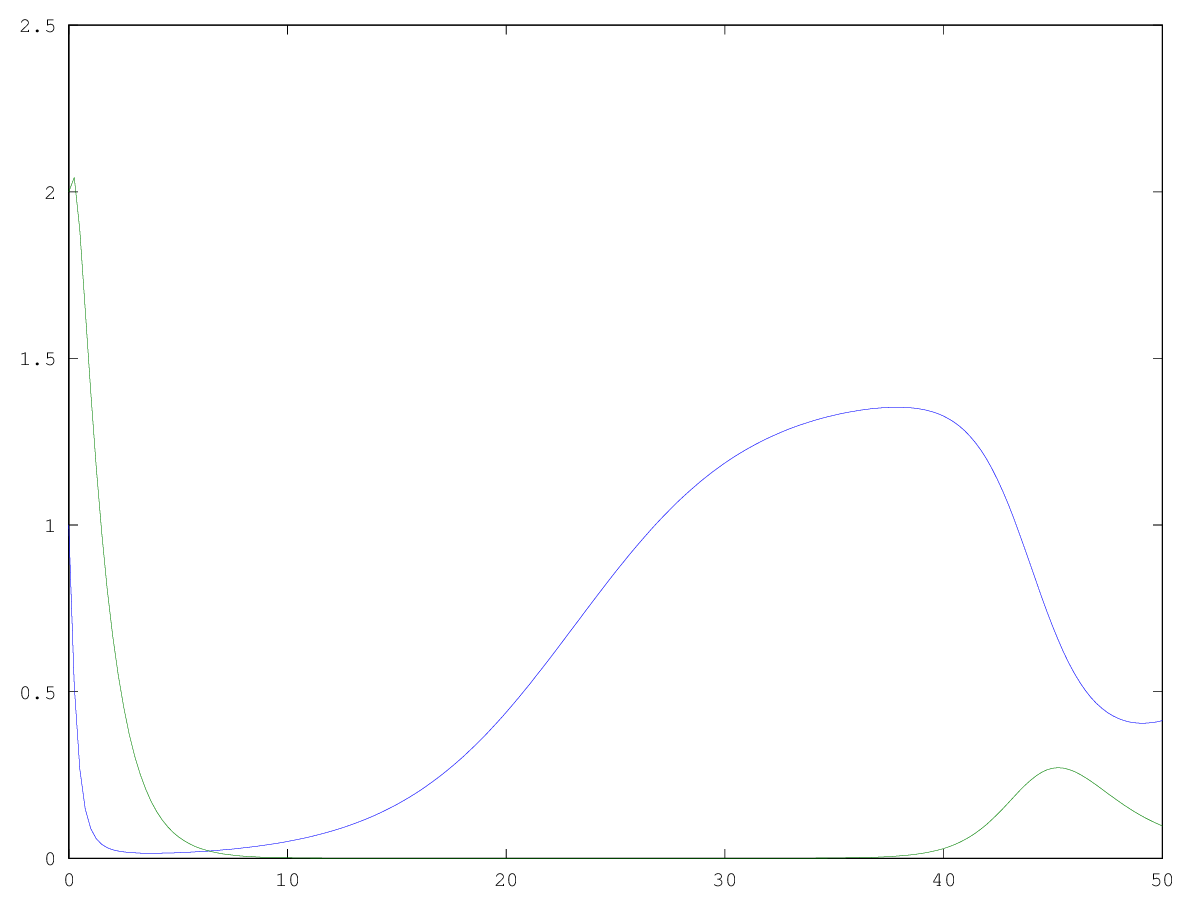

In [53]:
plot (t, x)

If you are using a graphical user interface, Octave will automatically create a separate window to display the plot.

To save a plot once it has been displayed on the screen, use the print command. For example,

```
print -dpdf foo.pdf
```

will create a file called foo.pdf that contains a rendering of the current plot in Portable Document Format. The command

```
help print
```

explains more options for the print command and provides a list of additional output file formats.